In [8]:
import time
import json
import pandas as pd
from io import StringIO
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [9]:
!curl -d "help" -X POST http://192.168.86.39/command

curl: (7) Failed to connect to 192.168.86.39 port 80: No route to host


In [10]:
def crane(cmd): 
    rv = !curl -m 3 -d '{cmd}' -X POST http://192.168.86.39/command
    return rv

In [11]:
def robot(cmd): 
    rv = !curl -d '{cmd}' -X POST http://192.168.86.37/command
    return "\n".join(rv)[1:]

In [12]:
def get_black_box():
    return pd.read_csv("http://192.168.86.37/black_box.csv")
    rv = !curl http://192.168.86.37/black_box.csv
    return "\n".join(rv)

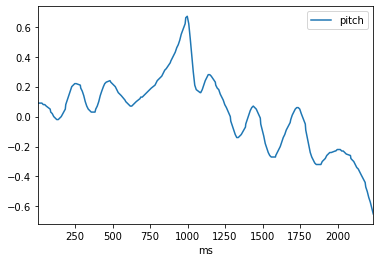

In [13]:
get_black_box().plot(x='ms',y='pitch');

In [14]:
print(robot("help"))

help: displays list of available commands
set_wifi_config: 
set_enable_wifi: 
set_motor_power: 
set_peripheral_power: 
shutdown: 
page_down: 
reset_odo: 
set_wheel_speed: 
set_wheel_speed_pid: 
go: 
stop: Emergency stop, sets motor power to zero
set_pitch_pid: 
get_pitch_pid: 
set_velocity_pid: 
get_black_box: returns last recording as csv


In [15]:
def crane_angle_pv():
    s = crane("s")[1]
    return json.loads(s)["angle_pv"]

In [16]:
def crane_is_moving():
    s = crane("s")[1]
    #print(s)
    return json.loads(s)["moving"]

In [17]:
# plot run from get_black_box()
def plot_run(df):
    fig=plt.figure();
    fig.set_size_inches((15,5))
    plt.subplot(1,2,1)
    plt.plot(df.ms,df.pitch,label='pitch');
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(df.ms,df.left_power,label='power')
    plt.plot(df.ms,df.left_velocity,label='velocity')
    plt.legend();

In [18]:
def test():
    robot("set_motor_power 0")
    count = 0
    crane("g 138 10")
    print("raising up crane")
    while(crane_is_moving()):
        count += 1
        time.sleep(0.1)
        pass
        #clear_output(wait=True)
        #display(crane_angle_pv())
    print(f"polled {count} times")
    time.sleep(1)
    print(robot("get_pitch_pid"))
    print("dropping crane")
    crane("g 0 5000")
    print("running robot")
    robot("go")
    time.sleep(5)
    df = get_black_box();
    plot_run(df)


In [19]:
test()

raising up crane


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
robot("set_pitch_pid 0.9 0 0.05")
test()

In [ ]:
robot("set_pitch_pid 0.5 0 0.02")
test()

In [ ]:
robot("set_pitch_pid 1.0 0 0.02")
test()

In [ ]:
robot("set_pitch_pid 1.0 0 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0.1 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0.1 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0.1 0.05")
test()

In [ ]:
robot("set_pitch_pid 1.0 0.1 0.05")
test()

In [20]:
for j in range(100):
    for i in range(10):
        s=crane("s")
    print(j*10,s)


0 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
10 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
20 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
30 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
40 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
50 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
60 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
70 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
80 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
90 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
100 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
110 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
120 ['', '{"angle_sp":90.00,"angle_pv":90.00,"rate":0.00,"moving":false}']
130 ['', '{"angle_sp":90.00,"angle_p